In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import file #

In [117]:
rates = pd.read_excel('baserate.xls', sheet_name='HISTORICAL SINCE 1694')


# Data Cleaning #

In [118]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  177 non-null    object 
 1   Unnamed: 1                                                  837 non-null    object 
 2   Unnamed: 2                                                  854 non-null    object 
 3   Unnamed: 3                                                  849 non-null    object 
 4   Unnamed: 4                                                  0 non-null      float64
 5   Unnamed: 5                                                  1 non-null      object 
 6   Unnamed: 6                                                  0 non-null      float64
 7   CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1  1 non-null      object 
dtyp

In [119]:
# Unnamed: 1 actually shows days, so we rename it to make it more accurate
rates.rename(columns = {'Unnamed: 1':'Day'}, inplace = True)

In [120]:
# What's in this db?
rates.info()
# because I can see the last 4 columns are basically empty, I will drop them later. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  177 non-null    object 
 1   Day                                                         837 non-null    object 
 2   Unnamed: 2                                                  854 non-null    object 
 3   Unnamed: 3                                                  849 non-null    object 
 4   Unnamed: 4                                                  0 non-null      float64
 5   Unnamed: 5                                                  1 non-null      object 
 6   Unnamed: 6                                                  0 non-null      float64
 7   CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1  1 non-null      object 
dtyp

In [121]:
# show me a random 20 to see if the column name has been changed and what other columns I need to modify.
rates.sample(n=20)

,Unnamed: 0,Day,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1"
218,NaN,19,Aug,2.5,NaN,NaN,NaN,NaN
756,NaN,2,Feb,10,NaN,NaN,NaN,NaN
435,NaN,18,Jun,3,NaN,NaN,NaN,NaN
217,NaN,15,Jul,3,NaN,NaN,NaN,NaN
239,NaN,16,Nov,4,NaN,NaN,NaN,NaN
96,NaN,15,Oct,7,NaN,NaN,NaN,NaN
713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,7,May,4,NaN,NaN,NaN,NaN
843,NaN,26,Aug,10.875,NaN,NaN,NaN,NaN
588,1920,15,Apr,7,NaN,NaN,NaN,NaN


In [122]:
# Drop unnamed tables 4,5,6 and changes in bank rate as they are completely blank. 
rates.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1'], axis = 1, inplace = True)

In [123]:
# Rename the rest of unnamed columns so they are reflective of their values
rates.rename(columns = {'Unnamed: 0':'Year', 'Unnamed: 2':'Month', 'Unnamed: 3': 'Rates'}, inplace = True)

In [124]:
# Show me the changes
rates.head(15)
# we can see here that the first 6 rows do not contain any data, so we need to drop them. 

,Year,Day,Month,Rates
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Date,NaN,NaN,New
3,effective,NaN,NaN,rate
4,NaN,NaN,NaN,%
5,Bank Rate,NaN,NaN,NaN
6,1694,NaN,Oct,6
7,NaN,NaN,NaN,NaN
8,1695,NaN,Jan,4.5
9,NaN,NaN,May,3


In [125]:
rates = rates.drop([0,1,2,3,4,5])

In [126]:
# We make sure they have been taken out, which they have. Now, we notice we will need to reset their indeces. 
rates.head(15)

,Year,Day,Month,Rates
6,1694,NaN,Oct,6
7,NaN,NaN,NaN,NaN
8,1695,NaN,Jan,4.5
9,NaN,NaN,May,3
10,NaN,NaN,NaN,NaN
11,1699,NaN,June,4.5
12,NaN,NaN,NaN,NaN
13,1716,NaN,July,4
14,NaN,NaN,NaN,NaN
15,1719,NaN,Apr,5


In [127]:
# reset index for the whole dataframe. 
rates.reset_index()

,index,Year,Day,Month,Rates
0,6,1694,NaN,Oct,6
1,7,NaN,NaN,NaN,NaN
2,8,1695,NaN,Jan,4.5
3,9,NaN,NaN,May,3
4,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1026,1032,NaN,NaN,NaN,NaN
1027,1033,2023,2,Feb,4
1028,1034,NaN,23,Mar,4.25
1029,1035,NaN,11,May,4.5


In [128]:
rates.tail(16)

,Year,Day,Month,Rates
1021,NaN,NaN,NaN,NaN
1022,2021,16,Dec,0.25
1023,NaN,NaN,NaN,NaN
1024,2022,3,Feb,0.5
1025,NaN,17,Mar,0.75
1026,NaN,5,May,1
1027,NaN,16,Jun,1.25
1028,NaN,4,Aug,1.75
1029,NaN,22,Sep,2.25
1030,NaN,3,Nov,3


In [129]:
# we try to get only the values where the year was at least 2007 but It throws an error, so we want to check dtypes. 
filtered_rates = rates[rates.Year > 2007]

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
rates.dtypes
# we see that the previous code was not working because the year column is not an integer, neither are the day and rates (which should be a float).

Year     object
Day      object
Month    object
Rates    object
dtype: object

In [ ]:
# we want to change the dtypes of the previous mentioned columns but we are getting an error indicating that this is not possible because there are null values. 
rates["Year"] = rates["Year"].astype("int")

ValueError: cannot convert float NaN to integer

In [130]:

# rates["Year"] = rates["Year"].astype("int")

# To avoid deleting data that will be valuable, we are going to ask Pandas to fill in the NaNS with the previous year up to a maximum of 12 (as the number of months in a year)
rates["Year"].fillna(method="bfill", limit=12, inplace=True)

In [131]:
# here we can see they have all filled with the previous year. We noticed there are more NaN values on the days, month and even rates columns. Since we only want rows with rates, we can drop the ones that do not have this info.

rates.sample(n=25)

,Year,Day,Month,Rates
698,1968,NaN,NaN,NaN
364,1884,NaN,NaN,NaN
85,1857,26,June,4.5
768,1977,10,Jan,14
757,1977,9,Feb,9.5
719,1973,NaN,NaN,NaN
444,1893,20,Oct,3
1003,2008,7,Feb,5.25
225,1871,11,Aug,5.5
868,1985,6,Jul,10


In [132]:
rates = rates.dropna(subset=["Rates"])

In [133]:
rates.sample(n=25)

,Year,Day,Month,Rates
287,1875,4,Jun,3
957,1998,6,Nov,7.25
634,1933-1938,21,Apr,3
717,1973,11,Dec,8
476,1899,30,Jun,2.5
19,1825,NaN,Dec,5
812,1982,6,Nov,15.0625
773,NaN,21,Mar,10.5
64,1853,6,Jan,2.5
570,1915,29,Jan,3


In [134]:
# We need to check if there are anymore NaNs and where they are. 
# We need to check why there are still NaNs values in the year column.  
rates.isna().sum()

Year     62
Day      17
Month     0
Rates     0
dtype: int64

In [135]:
rows_with_nans = rates[rates["Year"].isna()]
rows_with_nans
# we can see that they have not been filled with the previous year because we put a limit of 12 assuming the rates were only changing once a month, but we can see here some months had more than one change. 

,Year,Day,Month,Rates
159,NaN,11,Feb,7
160,NaN,25,Feb,6
161,NaN,16,Apr,7
175,NaN,26,Jan,5
176,NaN,2,Mar,4.5
...,...,...,...,...
841,NaN,24,Aug,11.125
865,NaN,14,Mar,8.5625
1034,NaN,23,Mar,4.25
1035,NaN,11,May,4.5


In [136]:
# so we try the same method as before but changing the limit
rates["Year"].fillna(method="bfill", limit=20, inplace=True)

In [137]:
# There are still 7 rows, as 20 is a significantly big number for a limit we dont want to keep increasing it. 7 rows is statistacally not significant, so we will drop these rows. 
rates.isna().sum()

Year      7
Day      17
Month     0
Rates     0
dtype: int64

In [138]:
rates = rates.dropna(subset=["Year"])

In [139]:
# We check again to make sure they have been dropped, and move on to analysing why there are 17 null values in the Day column. 
rates.isna().sum()

Year      0
Day      17
Month     0
Rates     0
dtype: int64

In [140]:
rows_with_nans_day = rates[rates["Day"].isna()]
rows_with_nans_day
# the missing values here are not very significant as we are assuming they only changed the rates once a month and as long as we have the month and rates, it will not make a difference. However, to make it cleaner we can fill them in with the median number of the Day column. 

,Year,Day,Month,Rates
6,1694,NaN,Oct,6
8,1695,NaN,Jan,4.5
9,1699,NaN,May,3
11,1699,NaN,June,4.5
13,1716,NaN,July,4
15,1719,NaN,Apr,5
17,1822,NaN,June,4
19,1825,NaN,Dec,5
21,1827,NaN,July,4
23,1836,NaN,July,4.5


In [141]:
day_median = rates.Day.median()
day_median

14.0

In [142]:
# Now we replace them with 14
rates["Day"].fillna(day_median, inplace=True)

In [143]:
# we can see they have all been filled now. 
rates.Day.isna().sum()

0

In [144]:
rates.sample(n=20)

,Year,Day,Month,Rates
782,1978,12,Sep,6.5
810,1982,12,Oct,15
197,1867,12,May,10
174,1865,12,Jan,5.5
98,1858,5,Nov,9
872,1985,16,Aug,10.75
482,1900,13,Jul,3.5
198,1867,16,Aug,8
774,1978,31,Mar,9.5
85,1857,26,June,4.5


In [145]:
# Now we only want the entries from 2007 onwards. For this, we need to make sure the year column is an int, which is not.
rates.dtypes

Year     object
Day      object
Month    object
Rates    object
dtype: object

In [146]:
rates["Year"] = rates["Year"].astype("int")
# It flags up an error where one of the columns is using a range of dates, making it impossible to change to an int. Since this date is out of the range we are interested in analysing it, we can . 

ValueError: invalid literal for int() with base 10: '1933-1938'

In [147]:

rates["Year"] = rates["Year"].astype("str")
range_rows = rates[rates["Year"].str.contains("-")]
# Drop the range rows
rates = rates.drop(range_rows.index)

In [148]:
rates["Year"] = rates["Year"].astype("int")
# We try to convert it to an int but there is a value (Repo Rate) that is not allowing us to do that. As this value is not benefitial, we will drop it. 

ValueError: invalid literal for int() with base 10: 'Repo Rate'

In [149]:
# Remove the value 'Repo Rate' from the Year column
rates = rates.loc[rates["Year"] != "Repo Rate"]

In [150]:
# Convert the Year column to an integer dtype
rates["Year"] = rates["Year"].astype("int")

In [151]:
# Convert the column Day to int
rates["Day"] = rates["Day"].astype("int")

In [152]:
# Convert the rates column to a float 
rates["Rates"] = rates["Rates"].astype("float")

In [153]:
rates.dtypes

Year       int64
Day        int64
Month     object
Rates    float64
dtype: object

In [154]:
rates = rates.reset_index(drop=True)

In [155]:
# now that the db looks like we want it to, we can export it to csv 
rates.to_csv('interest_rates_clean_all_years.csv')

In [156]:
# Filter the DataFrame to get only the rows where the year is greater than or equal to 2007
# rates = rates[rates["Year"] >= 2007]


In [157]:
rates.head()

,Year,Day,Month,Rates
0,1694,14,Oct,6.0
1,1695,14,Jan,4.5
2,1699,14,May,3.0
3,1699,14,June,4.5
4,1716,14,July,4.0


In [158]:
rates.tail()

,Year,Day,Month,Rates
824,2023,4,Aug,1.75
825,2023,22,Sep,2.25
826,2023,3,Nov,3.00
827,2023,15,Dec,3.50
828,2023,2,Feb,4.00


In [ ]:
# rates = rates.reset_index(drop=True)

# Descriptive Analysis #

In [160]:
rates.describe()

,Year,Day,Rates
count,829.000000,829.000000,829.000000
mean,1918.358263,14.811821,5.903219
std,56.434377,8.686894,3.261949
min,1694.000000,1.000000,0.100000
25%,1873.000000,7.000000,3.500000
50%,1900.000000,14.000000,5.000000
75%,1978.000000,22.000000,7.500000
max,2023.000000,31.000000,17.000000


In [161]:
rates.Rates.mean()

5.903219300361881

In [162]:
rates.Rates.median()

5.0

<Axes: xlabel='Rates'>

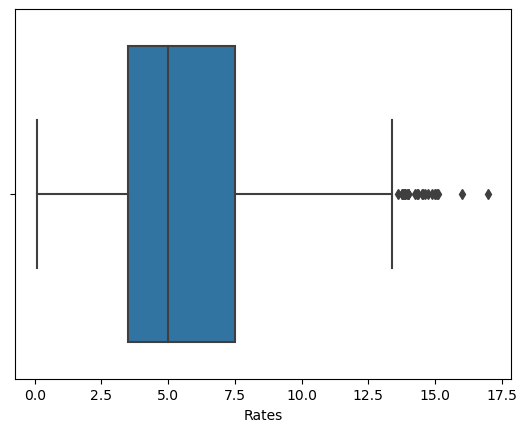

In [163]:
# Checking for outliers
sns.boxplot(x = rates['Rates'])

In [164]:

outliers = np.where(rates['Rates']>13)

In [165]:
# Create a new DataFrame with the outliers
outliers_rates = rates.iloc[outliers]

In [166]:
outliers

(array([611, 612, 613, 614, 615, 616, 640, 643, 644, 645, 646, 649, 650,
        651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 662, 711, 712,
        743, 744, 745, 746, 747, 748, 749]),)

In [167]:
# Average rates per year

rates_per_year = rates.groupby([rates['Year']])['Rates'].mean()
rates_per_year

Year
1694    6.0000
1695    4.5000
1699    3.7500
1716    4.0000
1719    5.0000
         ...  
2018    0.7500
2020    0.2500
2021    0.1750
2022    0.5000
2023    2.1875
Name: Rates, Length: 164, dtype: float64

# Data Visualisation #

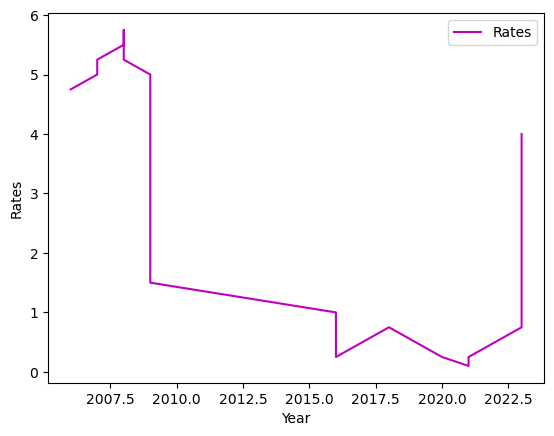

In [182]:

y = rates["Rates"]
x = rates["Year"]
# Only show the data from 2008 onwards
after_2006 = rates[rates["Year"] >= 2006]

y_after_2006 = after_2006["Rates"]
x_after_2006 = after_2006["Year"]

plt.plot(x_after_2006, y_after_2006, color = 'm')
plt.ylabel('Rates')
plt.xlabel('Year')
plt.legend(["Rates"], loc ="upper right")
plt.show()
